# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [335]:
m=4
p = 0.01#0.4
q = 1#1.0#0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [336]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

global source=false

false

In [337]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [338]:
using Quadmath, Printf

res=m;
N=2.0^m*100.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [339]:
print(N)

800.0

In [340]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [341]:
using Printf
include("./TMYangMillsTWO.jl");

In [342]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.00125
the time step is 0.000625


# Initial data of m β Ψ and Ψ,x

In [343]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initpi=zeros(L)
initderxxchi=zeros(L)
initderpsi=zeros(L)
initxxchi=zeros(L)

#state array is m beta psi xxchi,u xxchi,rORx psi,r xxchi r
state_array=[initm initbeta initpsi initpi initderxxchi initderpsi initxxchi initX];
#attention:  in noncompactified code derxchi is (xchi),r. in compactified code derxchi is (xchi),x


#PSI,R
A=0.075*p*(1−q)
r0=0.2
sigma=0.1

initderpsi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,6] = initderpsi
state_array=ghost(state_array)

#XCHI
A=0.01
r0=0.2
sigma=0.1

initxxchi[4:L-3] = init_xxchi(initX1,r0,sigma,A)

state_array[:,7] = initxxchi

####
#PSI FROM PSI,R, CHI,R FROM CHI
state_array[4:L-3,5]=Der_arrayLOP(state_array,7,initX)[4:L-3]#derivative(xchi_func, initX1; nu=1)#Der_array(state_array,7,initX)[4:L-3]


aux=Der_arrayLOP(state_array,5,initX)


# update interpolation of psi,x
derxxchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,5],  k=4);
derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,6],  k=4);
xxchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,7],  k=4);
derrxxchi_func = Spline1D(initX[4:L-3], aux[4:L-3], k=4);

funcs=[derxxchi_func derpsi_func xxchi_func derrxxchi_func];

In [344]:
y0=[0.0 0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:4] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:4] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

801×4 Matrix{Float64}:
 0.0  0.0  0.0   0.0
 0.0  0.0  0.0   1.76224e-10
 0.0  0.0  0.0   2.19524e-9
 0.0  0.0  0.0   8.40252e-9
 0.0  0.0  0.0   2.08758e-8
 0.0  0.0  0.0   4.20556e-8
 0.0  0.0  0.0   7.43754e-8
 0.0  0.0  0.0   1.20267e-7
 0.0  0.0  0.0   1.82167e-7
 0.0  0.0  0.0   2.62518e-7
 0.0  0.0  0.0   3.6378e-7
 0.0  0.0  0.0   4.88428e-7
 0.0  0.0  0.0   6.38961e-7
 ⋮              
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628
 0.0  0.0  0.0  -0.000886628

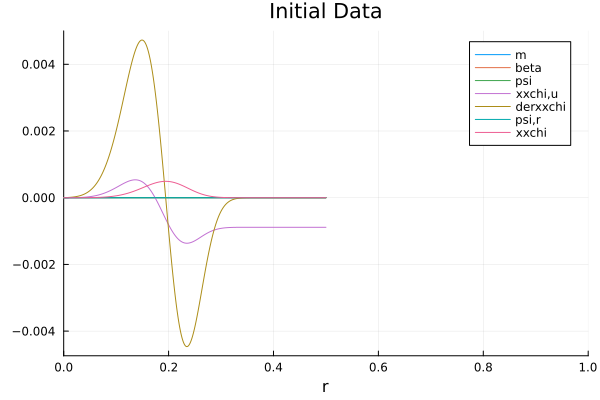

In [345]:
using Plots #showing initial data and the initial status of the horizon finder
plot(compactify.(initX[4:L-3]), state_array[4:L-3,1:7], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "xxchi,u" "derxxchi" "psi,r" "xxchi"],xlim=[0,1])

In [346]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [347]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "deruxxchi", "derxxchi", "derpsi", "xxchi"]


print_muninn(files, 0, state_array[:,1:7],res,"w", state_array[:,8])

In [348]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [349]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.0050093906494504


In [350]:
using Base.Threads
Threads.nthreads()

4

In [351]:
dt=0.001/2^(m-1)*2

0.00025

 ## Time evolution

fixed grid

In [352]:
finaltime=3
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 0.00025, t=0.02500000000000002 speed is 0.49875078125000005, dx/dt=5.0


iteration 200 dt is 0.00025, t=0.05000000000000004 speed is 0.49875078125000005, dx/dt=5.0


iteration 300 dt is 0.00025, t=0.07500000000000005 speed is 0.49875078125000005, dx/dt=5.0


iteration 400 dt is 0.00025, t=0.10000000000000007 speed is 0.49875078125000005, dx/dt=5.0


iteration 500 dt is 0.00025, t=0.12500000000000008 speed is 0.49875078125000005, dx/dt=5.0


iteration 600 dt is 0.00025, t=0.1500000000000001 speed is 0.49875078125000005, dx/dt=5.0


iteration 700 dt is 0.00025, t=0.17500000000000013 speed is 0.49875078125000005, dx/dt=5.0


iteration 800 dt is 0.00025, t=0.20000000000000015 speed is 0.49875078125000005, dx/dt=5.0


iteration 900 dt is 0.00025, t=0.22500000000000017 speed is 0.49875078125000005, dx/dt=5.0


iteration 1000 dt is 0.00025, t=0.25000000000000017 speed is 0.49875078125000005, dx/dt=5.0


iteration 1100 dt is 0.00025, t=0.2749999999999974 speed is 0.498750



iteration 9000 dt is 0.00025, t=2.250000000000113 speed is 0.49875078125000005, dx/dt=5.0


iteration 9100 dt is 0.00025, t=2.275000000000099 speed is 0.49875078125000005, dx/dt=5.0


iteration 9200 dt is 0.00025, t=2.300000000000085 speed is 0.49875078125000005, dx/dt=5.0


iteration 9300 dt is 0.00025, t=2.3250000000000712 speed is 0.49875078125000005, dx/dt=5.0


iteration 9400 dt is 0.00025, t=2.3500000000000574 speed is 0.49875078125000005, dx/dt=5.0


iteration 9500 dt is 0.00025, t=2.3750000000000435 speed is 0.49875078125000005, dx/dt=5.0


iteration 9600 dt is 0.00025, t=2.4000000000000297 speed is 0.49875078125000005, dx/dt=5.0


iteration 9700 dt is 0.00025, t=2.425000000000016 speed is 0.49875078125000005, dx/dt=5.0


iteration 9800 dt is 0.00025, t=2.450000000000002 speed is 0.49875078125000005, dx/dt=5.0


iteration 9900 dt is 0.00025, t=2.474999999999988 speed is 0.49875078125000005, dx/dt=5.0


iteration 10000 dt is 0.00025, t=2.4999999999999742 speed is 0.49875078125